In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=199ed195cd92c93426d8988b42aea1fbbec952253a1c79ae41bdf82e9996d6bc
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
# Reads the dataset from csv
df = pd.read_csv("/gdrive/MyDrive/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.groupby('Pclass').Age.apply(lambda x: x.isna().sum())
#most passenger class 3, have age nas
# this is a consequence as we wil see later of a different phenomenent

Pclass
1     30
2     11
3    136
Name: Age, dtype: int64

In [ ]:
df.groupby('Sex').Age.apply(lambda x: x.isna().sum())
# we see that have more nas in the age for males than for females

Sex
female     53
male      124
Name: Age, dtype: int64

In [ ]:
df.groupby('Survived').Age.apply(lambda x: x.isna().sum())
#many more of those who died, we do not have ages
# and these correlate to the previous factors we looked at earlier


Survived
0    125
1     52
Name: Age, dtype: int64

<Axes: xlabel='Embarked', ylabel='Fare'>

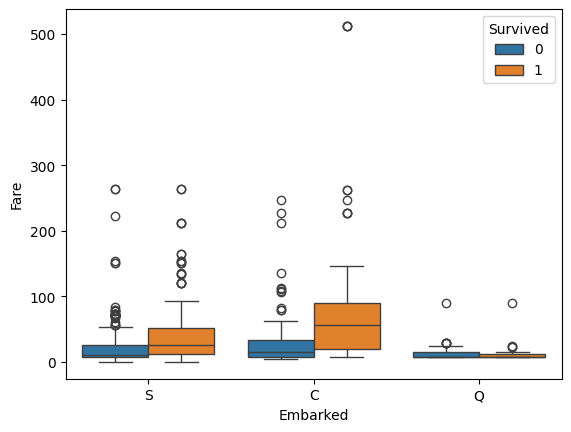

In [ ]:
sns.boxplot(data=df, x="Embarked", y="Fare", hue="Survived")
# as we can see here, it does not look as if embarked in of and of itself actually makes a big different
#it seems to be more dependent on the fare for survival

<Axes: xlabel='Pclass', ylabel='Age'>

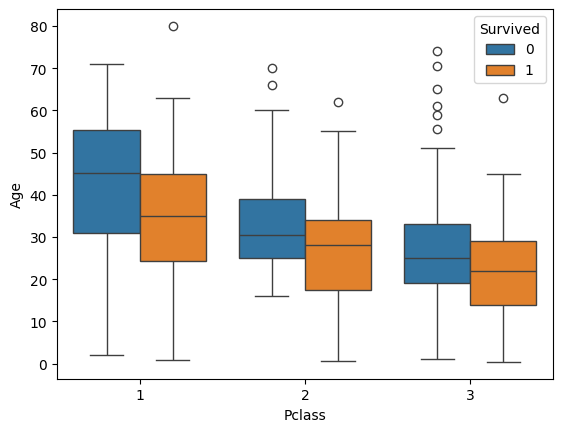

In [ ]:
sns.boxplot(data=df, x="Pclass", y="Age", hue="Survived")
#age has more of a factor, but we can also see that the passenger class does seem to have more general impact
#but in combination it has good explanatory value

<Axes: xlabel='Pclass', ylabel='Fare'>

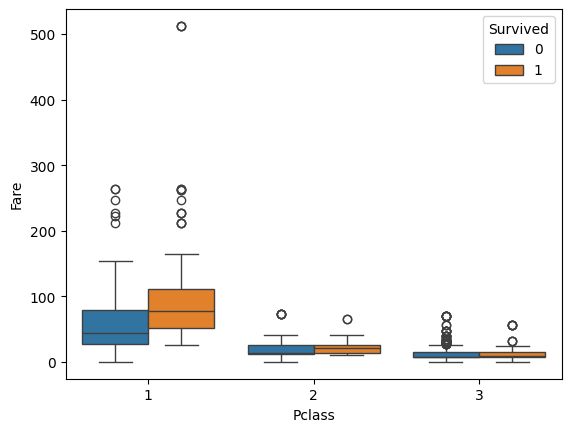

In [ ]:
sns.boxplot(data=df, x="Pclass", y="Fare", hue="Survived")
#this one has some of the most potent explanatory value, as passenger class in comination with  uch you paid
# tells you a lot of what is going on

<Axes: xlabel='Sex', ylabel='Age'>

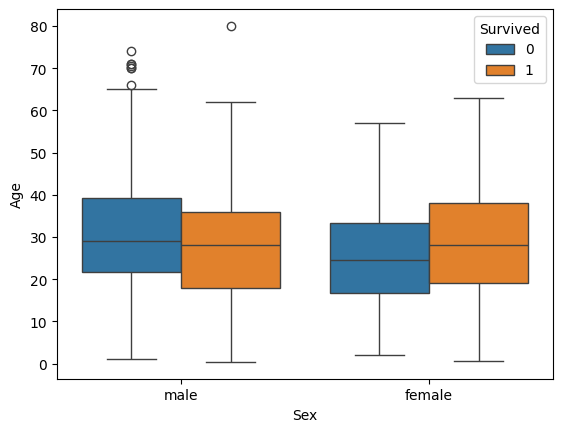

In [ ]:
sns.boxplot(data=df, x="Sex", y="Age", hue="Survived")
# as this graph below shows us, the adage women and children is largely false
# we do not see anywhere near the effect for age and gender that we do for fare
#but eniough to keep it

<Axes: xlabel='Sex', ylabel='Fare'>

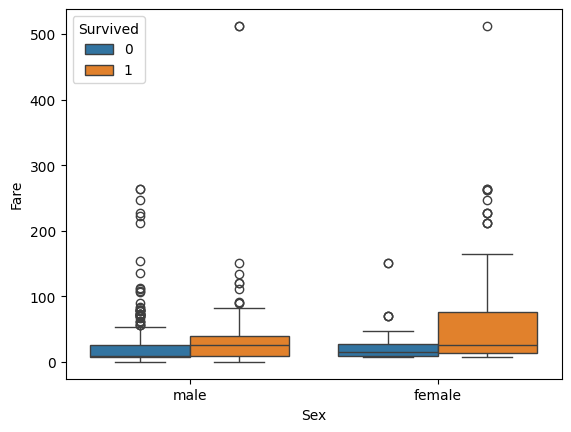

In [ ]:
sns.boxplot(data=df, x="Sex", y="Fare", hue="Survived")
# it seems as if women who paid more are really the ones who survived much more

<Axes: xlabel='Age', ylabel='Count'>

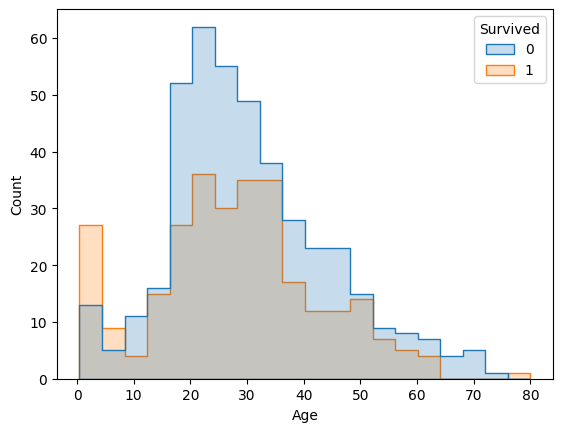

In [ ]:
sns.histplot(df, x="Age", hue="Survived", element="step")
# we can see age has much lower effect here

<Axes: xlabel='Fare', ylabel='Count'>

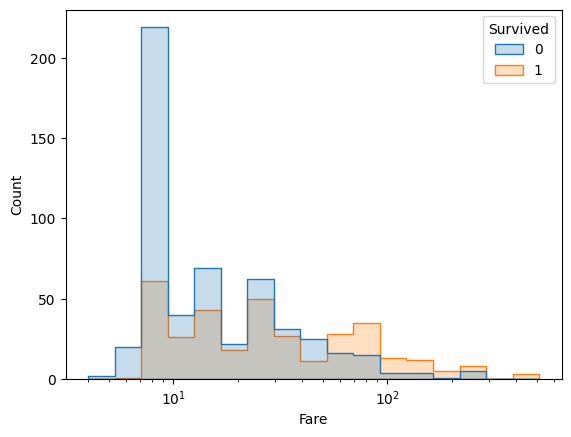

In [ ]:
sns.histplot(df, x="Fare", hue="Survived", element="step",log_scale=True,)
#however we see that fare is a much better explanatory factor than age

<Axes: ylabel='Embarked'>

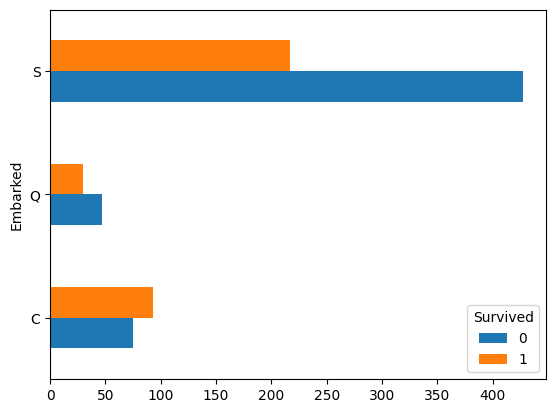

In [ ]:
df.groupby('Embarked').Survived.value_counts().unstack().plot.barh()
#proportionally it does not seem that embarked really tells us that much

<Axes: ylabel='Pclass'>

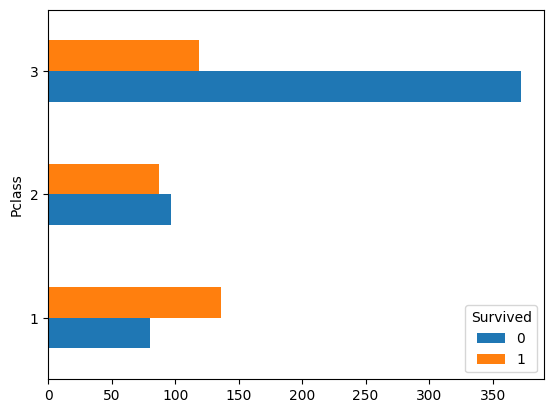

In [ ]:
df.groupby('Pclass').Survived.value_counts().unstack().plot.barh()
#in comparison class tells us so much more in terms who lived and who died,
#so for simplicity we can keep out

In [ ]:
df.Age.median()

28.0

EDA is done, lets now do the spark stuff


In [ ]:
from pyspark.sql import SparkSession
spark  = SparkSession.builder.appName('ApplicationName').getOrCreate()

In [ ]:
pd.read_csv("/gdrive/MyDrive/train.csv")['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
from pyspark.sql.functions import isnan
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType,ShortType
df = pd.read_csv("/gdrive/MyDrive/train.csv")
df = spark.createDataFrame(df)
def replace_age_nas(x):
  age = x
  if np.isnan(age):
    age = 28.0
  return age

def one_hot_encode_gender(n):
  retval = 0
  if n=='male':
    retval=1
  return retval

replace_nas_udf=udf(replace_age_nas, FloatType())
one_hot_encode_gender_udf = udf(one_hot_encode_gender, ShortType())
df_new=df.select( 'Survived', 'Pclass', one_hot_encode_gender_udf('Sex').alias('Sex'), 'SibSp','Parch','Fare',replace_nas_udf("Age").alias('Age'))



In [ ]:
df_new.dtypes

[('Survived', 'bigint'),
 ('Pclass', 'bigint'),
 ('Sex', 'smallint'),
 ('SibSp', 'bigint'),
 ('Parch', 'bigint'),
 ('Fare', 'double'),
 ('Age', 'float')]

In [ ]:
df_new.show(5)

+--------+------+---+-----+-----+-------+----+
|Survived|Pclass|Sex|SibSp|Parch|   Fare| Age|
+--------+------+---+-----+-----+-------+----+
|       0|     3|  1|    1|    0|   7.25|22.0|
|       1|     1|  0|    1|    0|71.2833|38.0|
|       1|     3|  0|    0|    0|  7.925|26.0|
|       1|     1|  0|    1|    0|   53.1|35.0|
|       0|     3|  1|    0|    0|   8.05|35.0|
+--------+------+---+-----+-----+-------+----+
only showing top 5 rows



In [ ]:
from pyspark.ml.feature import OneHotEncoder,StringIndexer
stringIndexer = StringIndexer(inputCol="Embarked",   outputCol="categoryIndex")
embarked = df.select('Embarked')
model = stringIndexer.fit(embarked)
indexed = model.transform(embarked)

encoder = OneHotEncoder(inputCols = ['categoryIndex'], outputCols = ['Output'])
mdl = encoder.fit(indexed)
encoded = mdl.transform(indexed)
encoded.show()

+--------+-------------+-------------+
|Embarked|categoryIndex|       Output|
+--------+-------------+-------------+
|       S|          0.0|(3,[0],[1.0])|
|       C|          1.0|(3,[1],[1.0])|
|       S|          0.0|(3,[0],[1.0])|
|       S|          0.0|(3,[0],[1.0])|
|       S|          0.0|(3,[0],[1.0])|
|       Q|          2.0|(3,[2],[1.0])|
|       S|          0.0|(3,[0],[1.0])|
|       S|          0.0|(3,[0],[1.0])|
|       S|          0.0|(3,[0],[1.0])|
|       C|          1.0|(3,[1],[1.0])|
|       S|          0.0|(3,[0],[1.0])|
|       S|          0.0|(3,[0],[1.0])|
|       S|          0.0|(3,[0],[1.0])|
|       S|          0.0|(3,[0],[1.0])|
|       S|          0.0|(3,[0],[1.0])|
|       S|          0.0|(3,[0],[1.0])|
|       Q|          2.0|(3,[2],[1.0])|
|       S|          0.0|(3,[0],[1.0])|
|       S|          0.0|(3,[0],[1.0])|
|       C|          1.0|(3,[1],[1.0])|
+--------+-------------+-------------+
only showing top 20 rows



In [ ]:
indexed.show(5)

+--------+-------------+
|Embarked|categoryIndex|
+--------+-------------+
|       S|          0.0|
|       C|          1.0|
|       S|          0.0|
|       S|          0.0|
|       S|          0.0|
+--------+-------------+
only showing top 5 rows



In [ ]:
from pyspark.mllib.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer

assembler1 = VectorAssembler(
    inputCols = [
    'Pclass', 'Sex','Age', 'SibSp','Parch','Fare','Age'],
    outputCol = 'features')

# Transform species labels to numeric
label_indexer = StringIndexer(inputCol = 'Survived', outputCol = 'label')

In [ ]:
test_size = 0.2
test_seed = 98



training_data_df, test_data_df = df_new.randomSplit([1-test_size,test_size],seed=test_seed)
training_data_df.printSchema()
training_data_df.show(5)
training_data_df.describe().show()

root
 |-- Survived: long (nullable = true)
 |-- Pclass: long (nullable = true)
 |-- Sex: short (nullable = true)
 |-- SibSp: long (nullable = true)
 |-- Parch: long (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Age: float (nullable = true)

+--------+------+---+-----+-----+-------+----+
|Survived|Pclass|Sex|SibSp|Parch|   Fare| Age|
+--------+------+---+-----+-----+-------+----+
|       0|     1|  0|    1|    2| 151.55| 2.0|
|       0|     1|  1|    0|    0|    0.0|40.0|
|       0|     1|  1|    0|    0|   26.0|28.0|
|       0|     1|  1|    0|    0|  26.55|62.0|
|       0|     1|  1|    0|    0|27.7208|28.0|
+--------+------+---+-----+-----+-------+----+
only showing top 5 rows

+-------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|           Survived|            Pclass|               Sex|             SibSp|             Parch|              Fare|               Age|
+-------+-

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression


# Pipeline for data transformation
pipeline = Pipeline(stages = [assembler1, label_indexer])

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression

lrevaluator = BinaryClassificationEvaluator(rawPredictionCol= 'prediction', labelCol='label', metricName='areaUnderROC')
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label')
lrParamGrid = ParamGridBuilder().addGrid(lr.regParam,[0.01,0.1,0.5]).addGrid(lr.elasticNetParam,[0,0.5,1]).build()

pipelineLR = Pipeline(stages = [pipeline, lr])
lrcv = CrossValidator(estimator = pipelineLR, estimatorParamMaps = lrParamGrid, evaluator= lrevaluator, numFolds= 5)
model = lrcv.fit(training_data_df)
lrpredictions = model.transform(training_data_df)
#figure out this string issue later

In [ ]:
print('Area Under ROC Curve:', lrevaluator.evaluate(lrpredictions))


Area Under ROC Curve: 0.7856549878015722


We choose GBT analysis to build an accurate predictive model for binary classification

In [ ]:
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(featuresCol='features', labelCol='label')
gbtParamGrid = ParamGridBuilder() \
    .addGrid(gbt.maxDepth, [5, 10, 15]) \
    .addGrid(gbt.maxIter, [10, 20, 30]) \
    .build()
pipelineGBT = Pipeline(stages=[pipeline, gbt])
gbtevaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='label', metricName='areaUnderROC')
gbtcv = CrossValidator(estimator=pipelineGBT, estimatorParamMaps=gbtParamGrid, evaluator=gbtevaluator, numFolds=5)
gbtModel = gbtcv.fit(training_data_df)
gbtpredictions = gbtModel.transform(training_data_df)

print('Area Under ROC Curve (GBT):', gbtevaluator.evaluate(gbtpredictions))

Area Under ROC Curve (GBT): 0.9029886148007591


Let's evaluate GBT performance with the ROC curve


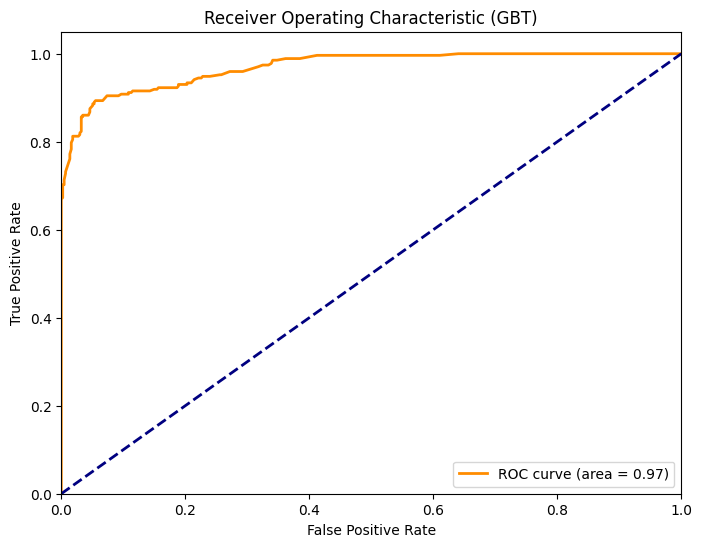

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

predictions = gbtpredictions.select('label', 'probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label']))).collect()
probabilities, labels = zip(*predictions)
fpr, tpr, _ = roc_curve(labels, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GBT)')
plt.legend(loc="lower right")
plt.show()

# Using Random Forest for Classification

In [ ]:
from pyspark.ml.classification import RandomForestClassifier


rf = RandomForestClassifier(featuresCol='features', labelCol='label')


rfParamGrid = ParamGridBuilder() \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .addGrid(rf.numTrees, [10, 20, 30]) \
    .build()

pipelineRF = Pipeline(stages=[pipeline, rf])

rfEvaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='label', metricName='areaUnderROC')

rfcv = CrossValidator(estimator=pipelineRF, estimatorParamMaps=rfParamGrid, evaluator=rfEvaluator, numFolds=5)
rfModel = rfcv.fit(training_data_df)

rfpredictions = rfModel.transform(training_data_df)

print('Area Under ROC Curve (Random Forest):', rfEvaluator.evaluate(rfpredictions))


Area Under ROC Curve (Random Forest): 0.9052927622661969


# Evaluating Random Forest Performance with ROC Curve

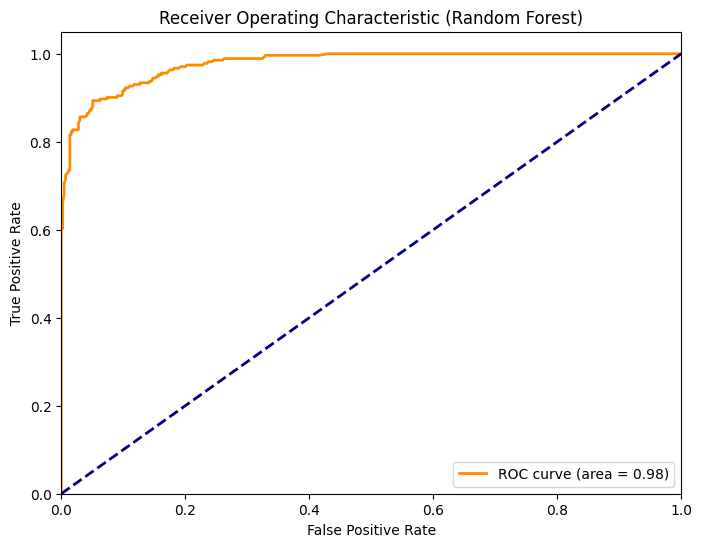

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

predictions = rfpredictions.select('label', 'probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label']))).collect()
probabilities, labels = zip(*predictions)
fpr, tpr, _ = roc_curve(labels, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()